In [506]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 500)  # показывать больше строк
pd.set_option('display.max_columns', 500)  # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

## Описание датасета
Посмотрим на переменные, которые содержит датасет:

**1 school** — аббревиатура школы, в которой учится ученик

**2 sex** — пол ученика ('F' - женский, 'M' - мужской)

**3 age** — возраст ученика (от 15 до 22)

**4 address** — тип адреса ученика ('U' - городской, 'R' - за городом)

**5 famsize** — размер семьи('LE3' <= 3, 'GT3' >3)

**6 Pstatus** — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

**7 Medu** — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

**8 Fedu** — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

**9 Mjob** — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

**10 Fjob** — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

**11 reason** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

**12 guardian** — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

**13 traveltime** — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

**14 studytime** — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

**15 failures** — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

**16 schoolsup** — дополнительная образовательная поддержка (yes или no)

**17 famsup** — семейная образовательная поддержка (yes или no)

**18 paid** — дополнительные платные занятия по математике (yes или no)

**19 activities** — дополнительные внеучебные занятия (yes или no)

**20 nursery** — посещал детский сад (yes или no)

**21 higher** — хочет получить высшее образование (yes или no)

**22 internet** — наличие интернета дома (yes или no)

**23 romantic** — в романтических отношениях (yes или no)

**24 famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

**25 freetime** — свободное время после школы (от 1 - очень мало до 5 - очень мого)

**26 goout** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

**27 health** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

**28 absences** — количество пропущенных занятий

**29 score** — баллы по госэкзамену по математике



In [507]:
display(stud_math.head(10))
stud_math.info()

school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
0     GP   F   18       U     NaN       A   4.0   4.0   at_home  teacher   
1     GP   F   17       U     GT3     NaN   1.0   1.0   at_home    other   
2     GP   F   15       U     LE3       T   1.0   1.0   at_home    other   
3     GP   F   15       U     GT3       T   4.0   2.0    health      NaN   
4     GP   F   16       U     GT3       T   3.0   3.0     other    other   
5     GP   M   16       U     LE3       T   4.0   3.0  services    other   
6     GP   M   16     NaN     LE3       T   2.0   2.0     other    other   
7     GP   F   17       U     GT3       A   4.0   4.0     other  teacher   
8     GP   M   15       U     LE3       A   3.0   2.0  services    other   
9     GP   M   15       U     NaN     NaN   3.0   4.0     other    other   

       reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0      course   mother         2.0        2.0       0.0       yes     no   no   
1      course   father         1.0        2.0       0.0        no    yes   no   
2       other   mother         1.0        2.0       3.0       yes     no  NaN   
3        home   mother         1.0        3.0       0.0        no    yes  yes   
4        home   father         1.0        2.0       0.0        no    yes  yes   
5  reputation   mother         1.0        2.0       0.0        no    yes  yes   
6        home   mother         1.0        2.0       0.0        no     no   no   
7        home   mother         2.0        2.0       0.0       yes    yes   no   
8        home   mother         1.0        2.0       0.0        no    yes  yes   
9        home   mother         1.0        2.0       0.0        no    yes  yes   

  activities nursery  studytime, granular higher internet romantic  famrel  \
0         no     yes                 -6.0    yes      NaN       no     4.0   
1         no      no                 -6.0    yes      yes       no     5.0   
2         no     yes                 -6.0    yes      yes      NaN     4.0   
3        yes     yes                 -9.0    yes      yes      yes     3.0   
4         no     yes                 -6.0    yes       no       no     4.0   
5        yes     yes                 -6.0    yes      yes       no     5.0   
6         no     yes                 -6.0    yes      yes       no     4.0   
7         no     yes                 -6.0    yes       no       no     4.0   
8         no     yes                 -6.0    yes      yes       no     NaN   
9        yes     yes                 -6.0    yes      yes       no     5.0   

   freetime  goout  health  absences  score  
0       3.0    4.0     3.0       6.0   30.0  
1       3.0    3.0     3.0       4.0   30.0  
2       3.0    2.0     3.0      10.0   50.0  
3       2.0    2.0     5.0       2.0   75.0  
4       3.0    2.0     5.0       4.0   50.0  
5       4.0    2.0     5.0      10.0   75.0  
6       4.0    4.0     3.0       0.0   55.0  
7       1.0    4.0     1.0       6.0   30.0  
8       2.0    2.0     1.0       0.0   95.0  
9       5.0    1.0     5.0       0.0   75.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [508]:
# переименую названия столбцов для интуитивного восприятия
stud_math.columns = ['school', 'sex', 'age', 'address', 'famaly_size', 'Cohabitation_status', 'Mother_edu',
                     'Father_edu', 'Mother_job', 'Father_job', 'reason', 'guardian', 'travel_time', 'study_time',
                     'failures', 'school_sup', 'fam_sup', 'math_paid', 'activities', 'nursery', 'studytime, granular',
                     'higher', 'internet', 'romantic', 'fam_relations', 'free_time', 'go_out', 'health', 'absences', 'score']
stud_math

school sex  age address famaly_size Cohabitation_status  Mother_edu  \
0       GP   F   18       U         NaN                   A         4.0   
1       GP   F   17       U         GT3                 NaN         1.0   
2       GP   F   15       U         LE3                   T         1.0   
3       GP   F   15       U         GT3                   T         4.0   
4       GP   F   16       U         GT3                   T         3.0   
5       GP   M   16       U         LE3                   T         4.0   
6       GP   M   16     NaN         LE3                   T         2.0   
7       GP   F   17       U         GT3                   A         4.0   
8       GP   M   15       U         LE3                   A         3.0   
9       GP   M   15       U         NaN                 NaN         3.0   
10      GP   F   15       U         GT3                   T         4.0   
11      GP   F   15       U         GT3                 NaN         2.0   
12      GP   M   15       U         LE3                   T         4.0   
13      GP   M   15       U         GT3                   T         4.0   
14      GP   M   15       U         GT3                   A         2.0   
15      GP   F   16       U         GT3                 NaN         4.0   
16      GP   F   16       U         GT3                   T         4.0   
17      GP   F   16       U         GT3                   T         3.0   
18      GP   M   17       U         GT3                   T         3.0   
19      GP   M   16       U         LE3                   T         4.0   
20      GP   M   15       U         GT3                   T         4.0   
21      GP   M   15       U         GT3                   T         4.0   
22      GP   M   16       U         LE3                   T         4.0   
23      GP   M   16       U         LE3                   T         2.0   
24      GP   F   15       R         GT3                   T         2.0   
25      GP   F   16       U         GT3                 NaN         2.0   
26      GP   M   15       U         GT3                   T         2.0   
27      GP   M   15       U         GT3                   T         4.0   
28      GP   M   16       U         LE3                 NaN         3.0   
29      GP   M   16       U         GT3                   T         4.0   
30      GP   M   15       U         GT3                   T         4.0   
31      GP   M   15       U         GT3                   T         4.0   
32      GP   M   15       R         NaN                   T         4.0   
33      GP   M   15       U         LE3                   T         3.0   
34      GP   M   16       U         GT3                   T         3.0   
35      GP   F   15       U         GT3                   T         2.0   
36      GP   M   15       U         NaN                   T         4.0   
37      GP   M   16       R         GT3                   A         4.0   
38      GP   F   15       R         GT3                   T         3.0   
39      GP   F   15       R         GT3                   T         2.0   
40      GP   F   16       U         LE3                   T         2.0   
41      GP   M   15       U         LE3                   T         4.0   
42      GP   M   15       U         GT3                   T         4.0   
43      GP   M   15       U         GT3                   T         2.0   
44      GP   F   16       U         LE3                   T         2.0   
45      GP   F   15       U         LE3                   A         4.0   
46      GP   F   16       U         LE3                   A         3.0   
47      GP   M   16       U         GT3                   T         4.0   
48      GP   M   15       U         GT3                   T         4.0   
49      GP   F   15       U         GT3                   T         4.0   
50      GP   F   16       U         LE3                   T         2.0   
51      GP   F   15       U         LE3                   T         4.0   
52      GP   M   15     NaN  

## score
Рассмотрим этот показатель первым, т.к. он является ключевым. Имеется 6 пропусков. Удалим их.

In [509]:
stud_math = stud_math[np.isnan(stud_math.score) == False]
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   famaly_size          362 non-null    object 
 5   Cohabitation_status  344 non-null    object 
 6   Mother_edu           386 non-null    float64
 7   Father_edu           365 non-null    float64
 8   Mother_job           370 non-null    object 
 9   Father_job           353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  travel_time          361 non-null    float64
 13  study_time           382 non-null    float64
 14  failures             367 non-null    float64
 15  school_sup           380 non-null    obj

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

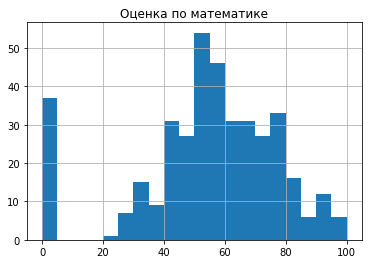

In [510]:
# Посмотрим на распределение признака
stud_math.score.hist(bins = 20) 
plt.title('Оценка по математике')
stud_math.score.describe()

In [511]:
# проверим уникальные значения
stud_math.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

In [512]:
# Вычленим выбросы.

score_IQR = stud_math.score.quantile(0.75) - stud_math.score.quantile(0.25)
score_margin1 = stud_math.score.quantile(0.75) + 1.5*score_IQR
score_margin2 = stud_math.score.quantile(0.25) - 1.5*score_IQR
print('нижний предел по общему правилу = ', score_margin2)
print('верхний предел по общему правилу = ', score_margin1)

нижний предел по общему правилу =  -5.0
верхний предел по общему правилу =  115.0


По общему правилу все значения не являются выбросами. Но пользуясь здравым смыслом, отсекаем значения 0, т.к. даже при самых неблагоприятных условиях человек получивший хоть какое-то обучение должен набрать хоть минимальный бал. Также на гистограмме распределения видно, что экзамены с оценкой ноль представляют собой всплеск. Удалим эти значения из датасета.

In [513]:
stud_math = stud_math[stud_math.score != False]
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               352 non-null    object 
 1   sex                  352 non-null    object 
 2   age                  352 non-null    int64  
 3   address              338 non-null    object 
 4   famaly_size          328 non-null    object 
 5   Cohabitation_status  311 non-null    object 
 6   Mother_edu           350 non-null    float64
 7   Father_edu           331 non-null    float64
 8   Mother_job           335 non-null    object 
 9   Father_job           320 non-null    object 
 10  reason               337 non-null    object 
 11  guardian             323 non-null    object 
 12  travel_time          329 non-null    float64
 13  study_time           345 non-null    float64
 14  failures             332 non-null    float64
 15  school_sup           343 non-null    obj

count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

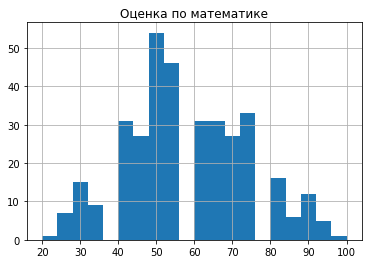

In [514]:
# Посмотрим на распределение признака еще раз
stud_math.score.hist(bins=20)
plt.title('Оценка по математике')
stud_math.score.describe()

## school

In [515]:
# рассмотрим столбец school
stud_math.school.value_counts()

GP    311
MS     41
Name: school, dtype: int64

Всего 2 школы. Пропущенных данных нет.

**Гипотеза**: Скорее всего распределения этих школ нужно будет анализировать отдельно.

In [516]:
# Проверим среднюю успеваемость в разных школах
stud_math.groupby(['school']).mean().score.round(2)

school
GP    58.22
MS    54.27
Name: score, dtype: float64

Успеваемость в школах не принципиально разная.  
Посмотрим более детально на боксплотах.

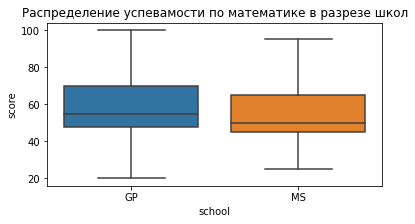

In [517]:
fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x='school', y='score', data=stud_math, ax=ax)
plt.xticks(rotation=0)
ax.set_title('Распределение успевамости по математике в разрезе школ')
plt.show()

## sex

In [518]:
# рассмотрим столбец school
stud_math.sex.value_counts()

F    182
M    170
Name: sex, dtype: int64

заполнены все поля

## age

Числовой столбец без пропусков, смотрим на распределение

count    352.000000
mean      16.633523
std        1.256011
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

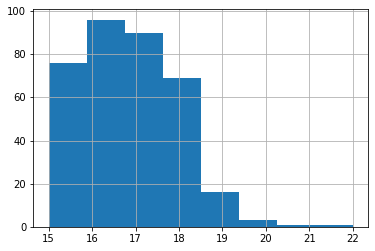

In [519]:
stud_math.age.hist(bins=8) # т.к. возраст от 15 до 22 лет, то количество интервалов ставим 8
stud_math.age.describe()

распределение без аномалий

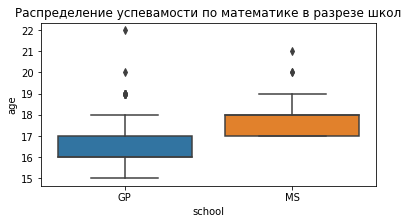

In [520]:
# рассмотрим возраст в разрезе школ.
fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x='school', y='age', data=stud_math, ax=ax)
plt.xticks(rotation=0)
ax.set_title('Распределение успевамости по математике в разрезе школ')
plt.show()

как видно на боксплотах в школе MS дети занимаются от 17 до 19 лет, в обоих школах есть выбросы, но удалять их нет оснований на текущем этапе, т.к. их изучение может дать дополнительные данные по успеваемости.

Посчитаем количество выбросов для каждой школы по возрасту

In [521]:
GP_IQR = stud_math[stud_math.school == 'GP'].age.quantile(
    0.75) - stud_math[stud_math.school == 'GP'].age.quantile(0.25)
MS_IQR = stud_math[stud_math.school == 'MS'].age.quantile(
    0.75) - stud_math[stud_math.school == 'MS'].age.quantile(0.25)

# границы выбросов
GP_out = stud_math[stud_math.school == 'GP'].age.quantile(0.75) + 1.5*GP_IQR
MS_out = stud_math[stud_math.school == 'MS'].age.quantile(0.75) + 1.5*MS_IQR

print('Количество выбросов по возрасту в школе GP = ', stud_math[(
    stud_math.school == 'GP') & (stud_math.age > GP_out)].age.count())

print('Количество выбросов по возрасту в школе MS = ', stud_math[(
    stud_math.school == 'MS') & (stud_math.age > MS_out)].age.count())

Количество выбросов по возрасту в школе GP =  15
Количество выбросов по возрасту в школе MS =  3


## address

Заменим пропуски на None

In [522]:
stud_math.loc[:, ['address']] = stud_math.address.apply(
    lambda x: None if pd.isnull(x) else x)
stud_math

school sex  age address famaly_size Cohabitation_status  Mother_edu  \
0       GP   F   18       U         NaN                   A         4.0   
1       GP   F   17       U         GT3                 NaN         1.0   
2       GP   F   15       U         LE3                   T         1.0   
3       GP   F   15       U         GT3                   T         4.0   
4       GP   F   16       U         GT3                   T         3.0   
5       GP   M   16       U         LE3                   T         4.0   
6       GP   M   16    None         LE3                   T         2.0   
7       GP   F   17       U         GT3                   A         4.0   
8       GP   M   15       U         LE3                   A         3.0   
9       GP   M   15       U         NaN                 NaN         3.0   
10      GP   F   15       U         GT3                   T         4.0   
11      GP   F   15       U         GT3                 NaN         2.0   
12      GP   M   15       U         LE3                   T         4.0   
13      GP   M   15       U         GT3                   T         4.0   
14      GP   M   15       U         GT3                   A         2.0   
15      GP   F   16       U         GT3                 NaN         4.0   
16      GP   F   16       U         GT3                   T         4.0   
17      GP   F   16       U         GT3                   T         3.0   
18      GP   M   17       U         GT3                   T         3.0   
19      GP   M   16       U         LE3                   T         4.0   
20      GP   M   15       U         GT3                   T         4.0   
21      GP   M   15       U         GT3                   T         4.0   
22      GP   M   16       U         LE3                   T         4.0   
23      GP   M   16       U         LE3                   T         2.0   
24      GP   F   15       R         GT3                   T         2.0   
25      GP   F   16       U         GT3                 NaN         2.0   
26      GP   M   15       U         GT3                   T         2.0   
27      GP   M   15       U         GT3                   T         4.0   
28      GP   M   16       U         LE3                 NaN         3.0   
29      GP   M   16       U         GT3                   T         4.0   
30      GP   M   15       U         GT3                   T         4.0   
31      GP   M   15       U         GT3                   T         4.0   
32      GP   M   15       R         NaN                   T         4.0   
33      GP   M   15       U         LE3                   T         3.0   
34      GP   M   16       U         GT3                   T         3.0   
35      GP   F   15       U         GT3                   T         2.0   
36      GP   M   15       U         NaN                   T         4.0   
37      GP   M   16       R         GT3                   A         4.0   
38      GP   F   15       R         GT3                   T         3.0   
39      GP   F   15       R         GT3                   T         2.0   
40      GP   F   16       U         LE3                   T         2.0   
41      GP   M   15       U         LE3                   T         4.0   
42      GP   M   15       U         GT3                   T         4.0   
43      GP   M   15       U         GT3                   T         2.0   
44      GP   F   16       U         LE3                   T         2.0   
45      GP   F   15       U         LE3                   A         4.0   
46      GP   F   16       U         LE3                   A         3.0   
47      GP   M   16       U         GT3                   T         4.0   
48      GP   M   15       U         GT3                   T         4.0   
49      GP   F   15       U         GT3                   T         4.0   
50      GP   F   16       U         LE3                   T         2.0   
51      GP   F   15       U         LE3                   T         4.0   
52      GP   M   15    None  

In [523]:
# рассмотрим уникальные значения столбца
stud_math.address.value_counts()

U    265
R     73
Name: address, dtype: int64

Большинство людей из города. Посмотрим в разрезе школ.

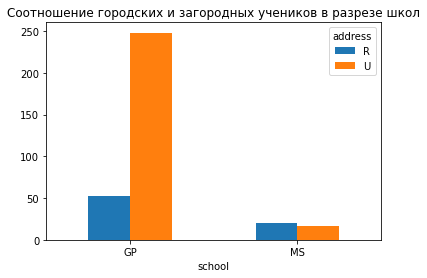

In [524]:
stud_math.pivot_table(values='sex',
                      index=['school'], columns=['address'],
                      aggfunc='count').plot(kind='bar', title='Соотношение городских и загородных учеников в разрезе школ')
plt.xticks(rotation=0)
plt.show()

Очевидно, что в школе GP занимаются преимущественно городские школьники. Школа MS - скорее всего загородная школа в небольшом населенном пункте.

## famaly_size

In [525]:
# Проверим уникальные значения
stud_math.famaly_size.value_counts()

GT3    228
LE3    100
Name: famaly_size, dtype: int64

In [526]:
# заменим пропуски
stud_math.loc[:, ['famaly_size']] = stud_math.famaly_size.apply(lambda x: None if pd.isnull(x) else 'small'
                                                                if x == 'LE3' else 'big' if x == 'GT3' else x)
stud_math

school sex  age address famaly_size Cohabitation_status  Mother_edu  \
0       GP   F   18       U        None                   A         4.0   
1       GP   F   17       U         big                 NaN         1.0   
2       GP   F   15       U       small                   T         1.0   
3       GP   F   15       U         big                   T         4.0   
4       GP   F   16       U         big                   T         3.0   
5       GP   M   16       U       small                   T         4.0   
6       GP   M   16    None       small                   T         2.0   
7       GP   F   17       U         big                   A         4.0   
8       GP   M   15       U       small                   A         3.0   
9       GP   M   15       U        None                 NaN         3.0   
10      GP   F   15       U         big                   T         4.0   
11      GP   F   15       U         big                 NaN         2.0   
12      GP   M   15       U       small                   T         4.0   
13      GP   M   15       U         big                   T         4.0   
14      GP   M   15       U         big                   A         2.0   
15      GP   F   16       U         big                 NaN         4.0   
16      GP   F   16       U         big                   T         4.0   
17      GP   F   16       U         big                   T         3.0   
18      GP   M   17       U         big                   T         3.0   
19      GP   M   16       U       small                   T         4.0   
20      GP   M   15       U         big                   T         4.0   
21      GP   M   15       U         big                   T         4.0   
22      GP   M   16       U       small                   T         4.0   
23      GP   M   16       U       small                   T         2.0   
24      GP   F   15       R         big                   T         2.0   
25      GP   F   16       U         big                 NaN         2.0   
26      GP   M   15       U         big                   T         2.0   
27      GP   M   15       U         big                   T         4.0   
28      GP   M   16       U       small                 NaN         3.0   
29      GP   M   16       U         big                   T         4.0   
30      GP   M   15       U         big                   T         4.0   
31      GP   M   15       U         big                   T         4.0   
32      GP   M   15       R        None                   T         4.0   
33      GP   M   15       U       small                   T         3.0   
34      GP   M   16       U         big                   T         3.0   
35      GP   F   15       U         big                   T         2.0   
36      GP   M   15       U        None                   T         4.0   
37      GP   M   16       R         big                   A         4.0   
38      GP   F   15       R         big                   T         3.0   
39      GP   F   15       R         big                   T         2.0   
40      GP   F   16       U       small                   T         2.0   
41      GP   M   15       U       small                   T         4.0   
42      GP   M   15       U         big                   T         4.0   
43      GP   M   15       U         big                   T         2.0   
44      GP   F   16       U       small                   T         2.0   
45      GP   F   15       U       small                   A         4.0   
46      GP   F   16       U       small                   A         3.0   
47      GP   M   16       U         big                   T         4.0   
48      GP   M   15       U         big                   T         4.0   
49      GP   F   15       U         big                   T         4.0   
50      GP   F   16       U       small                   T         2.0   
51      GP   F   15       U       small                   T         4.0   
52      GP   M   15    None  

In [527]:
# Проверим еще раз уникальные значения
stud_math.famaly_size.value_counts()

big      228
small    100
Name: famaly_size, dtype: int64

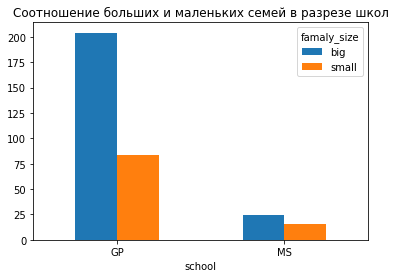

In [528]:
# посмотрим распределение в разрезе школ
stud_math.pivot_table(values='sex',
                      index=['school'], columns=['famaly_size'],
                      aggfunc='count').plot(kind='bar', title='Соотношение больших и маленьких семей в разрезе школ')
plt.xticks(rotation=0)
plt.show()

Как видно на графике, по данному показателю различия между школами нет. Удивительно, что большинство семей имеет больше 3 детей.

## Cohabitation_status

In [529]:
# Заменим пустые значения, заполненные значения заменим на более понятные
stud_math.loc[:, ['Cohabitation_status']] = stud_math.Cohabitation_status.apply(lambda x: None if pd.isnull(x) else 'together'
                                                                                if x == 'T' else 'apart' if x == 'A' else x)
stud_math

school sex  age address famaly_size Cohabitation_status  Mother_edu  \
0       GP   F   18       U        None               apart         4.0   
1       GP   F   17       U         big                None         1.0   
2       GP   F   15       U       small            together         1.0   
3       GP   F   15       U         big            together         4.0   
4       GP   F   16       U         big            together         3.0   
5       GP   M   16       U       small            together         4.0   
6       GP   M   16    None       small            together         2.0   
7       GP   F   17       U         big               apart         4.0   
8       GP   M   15       U       small               apart         3.0   
9       GP   M   15       U        None                None         3.0   
10      GP   F   15       U         big            together         4.0   
11      GP   F   15       U         big                None         2.0   
12      GP   M   15       U       small            together         4.0   
13      GP   M   15       U         big            together         4.0   
14      GP   M   15       U         big               apart         2.0   
15      GP   F   16       U         big                None         4.0   
16      GP   F   16       U         big            together         4.0   
17      GP   F   16       U         big            together         3.0   
18      GP   M   17       U         big            together         3.0   
19      GP   M   16       U       small            together         4.0   
20      GP   M   15       U         big            together         4.0   
21      GP   M   15       U         big            together         4.0   
22      GP   M   16       U       small            together         4.0   
23      GP   M   16       U       small            together         2.0   
24      GP   F   15       R         big            together         2.0   
25      GP   F   16       U         big                None         2.0   
26      GP   M   15       U         big            together         2.0   
27      GP   M   15       U         big            together         4.0   
28      GP   M   16       U       small                None         3.0   
29      GP   M   16       U         big            together         4.0   
30      GP   M   15       U         big            together         4.0   
31      GP   M   15       U         big            together         4.0   
32      GP   M   15       R        None            together         4.0   
33      GP   M   15       U       small            together         3.0   
34      GP   M   16       U         big            together         3.0   
35      GP   F   15       U         big            together         2.0   
36      GP   M   15       U        None            together         4.0   
37      GP   M   16       R         big               apart         4.0   
38      GP   F   15       R         big            together         3.0   
39      GP   F   15       R         big            together         2.0   
40      GP   F   16       U       small            together         2.0   
41      GP   M   15       U       small            together         4.0   
42      GP   M   15       U         big            together         4.0   
43      GP   M   15       U         big            together         2.0   
44      GP   F   16       U       small            together         2.0   
45      GP   F   15       U       small               apart         4.0   
46      GP   F   16       U       small               apart         3.0   
47      GP   M   16       U         big            together         4.0   
48      GP   M   15       U         big            together         4.0   
49      GP   F   15       U         big            together         4.0   
50      GP   F   16       U       small            together         2.0   
51      GP   F   15       U       small            together         4.0   
52      GP   M   15    None  

In [530]:
# Проверим уникальные значения
stud_math.Cohabitation_status.value_counts()

together    277
apart        34
Name: Cohabitation_status, dtype: int64

## Mother_edu

Столбец цифровой, имеет 2 пропуска

>**Для себя**
>
>Заменить пустые значения на None в оставшейся части таблицы - не очень хорошая идея, т.к. цифровые столбцы больше не воспринимаются как цифровые.
>
>stud_math = stud_math.where(pd.notnull(stud_math), None  
>stud_math

count    350.000000
mean       2.811429
std        1.091192
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Mother_edu, dtype: float64

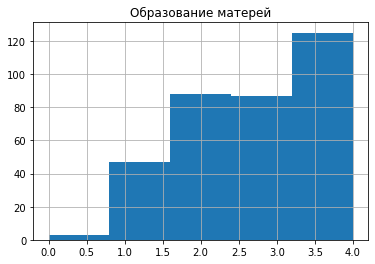

In [531]:
# Посмотрим на распределение признака, с учетом того, что может быть всего 5 дискретных значений
stud_math.Mother_edu.hist(bins=5)
plt.title('Образование матерей')
stud_math.Mother_edu.describe()

In [532]:
# проверим на всякий случай уникальные значения
stud_math.Mother_edu.value_counts()

4.0    125
2.0     88
3.0     87
1.0     47
0.0      3
Name: Mother_edu, dtype: int64

GP


count    309.000000
mean       2.854369
std        1.069723
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Mother_edu, dtype: float64

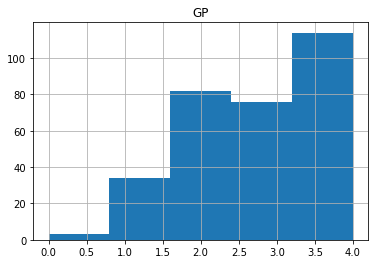

In [533]:
# посмотрим на распределение для школы GP
stud_math[stud_math.school == 'GP'].Mother_edu.hist(bins=5)
plt.title('GP')
print('GP')
stud_math[stud_math.school == 'GP'].Mother_edu.describe()

MS


count    41.000000
mean      2.487805
std       1.206689
min       1.000000
25%       1.000000
50%       3.000000
75%       4.000000
max       4.000000
Name: Mother_edu, dtype: float64

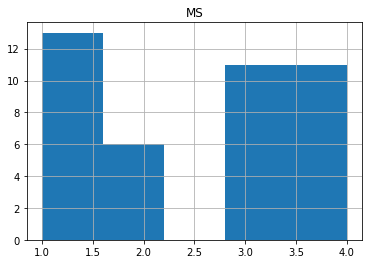

In [534]:
# посмотрим на распределение для школы MS
stud_math[stud_math.school == 'MS'].Mother_edu.hist(bins=5)
plt.title('MS')
print('MS')
stud_math[stud_math.school == 'MS'].Mother_edu.describe()

Пока не буду менять отсутствующие значения на среднее.

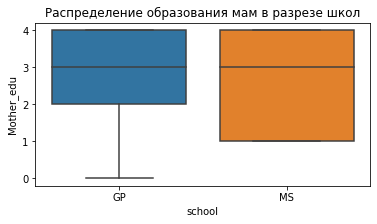

In [535]:
# рассмотрим образование мам в разрезе школ с использованием боксплот
fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x='school', y='Mother_edu', data=stud_math, ax=ax)
plt.xticks(rotation=0)
ax.set_title('Распределение образования мам в разрезе школ')
plt.show()

как видно на графиках выбросов нет

## Father_edu
имеет 21 пропуск

In [536]:
# проверим уникальные значения
stud_math.Father_edu.value_counts()

2.0     94
3.0     89
4.0     80
1.0     65
0.0      2
40.0     1
Name: Father_edu, dtype: int64

скорее всего одно значение ввели ошибочно вместо 4 - 40. Заменим это значение:

In [537]:
stud_math.loc[:, ['Father_edu']] = stud_math['Father_edu'].apply(lambda x: 4 if x == 40 else x)
# проверим еще раз уникальные значения
stud_math.Father_edu.value_counts()

2.0    94
3.0    89
4.0    81
1.0    65
0.0     2
Name: Father_edu, dtype: int64

count    331.000000
mean       2.549849
std        1.081424
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Father_edu, dtype: float64

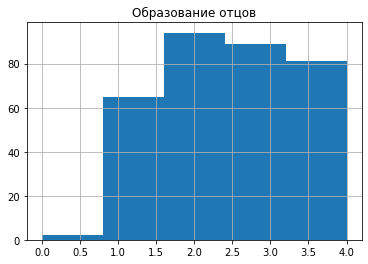

In [538]:
# Посмотрим на распределение признака, с учетом того, что может быть всего 5 дискретных значений
stud_math.Father_edu.hist(bins = 5) 
plt.title('Образование отцов')
stud_math.Father_edu.describe()

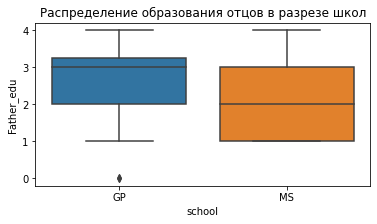

In [614]:
# рассмотрим образование отцов в разрезе школ с использованием боксплот
fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x='school', y='Father_edu', data=stud_math, ax=ax)
plt.xticks(rotation=0)
ax.set_title('Распределение образования отцов в разрезе школ')
plt.show()

Как видно из боксплотов, как образование мам, так и образование отцов в школе MS в среднем ниже.

## Mother_job
Номинативная величина с 17 пропусками. Заменим NaN на None оставшейся части таблицы

In [540]:
for z in stud_math.columns:
    stud_math.loc[:, z] = stud_math[z].apply(lambda x: None if pd.isnull(x) else x)
stud_math

school sex  age address famaly_size Cohabitation_status  Mother_edu  \
0       GP   F   18       U        None               apart         4.0   
1       GP   F   17       U         big                None         1.0   
2       GP   F   15       U       small            together         1.0   
3       GP   F   15       U         big            together         4.0   
4       GP   F   16       U         big            together         3.0   
5       GP   M   16       U       small            together         4.0   
6       GP   M   16    None       small            together         2.0   
7       GP   F   17       U         big               apart         4.0   
8       GP   M   15       U       small               apart         3.0   
9       GP   M   15       U        None                None         3.0   
10      GP   F   15       U         big            together         4.0   
11      GP   F   15       U         big                None         2.0   
12      GP   M   15       U       small            together         4.0   
13      GP   M   15       U         big            together         4.0   
14      GP   M   15       U         big               apart         2.0   
15      GP   F   16       U         big                None         4.0   
16      GP   F   16       U         big            together         4.0   
17      GP   F   16       U         big            together         3.0   
18      GP   M   17       U         big            together         3.0   
19      GP   M   16       U       small            together         4.0   
20      GP   M   15       U         big            together         4.0   
21      GP   M   15       U         big            together         4.0   
22      GP   M   16       U       small            together         4.0   
23      GP   M   16       U       small            together         2.0   
24      GP   F   15       R         big            together         2.0   
25      GP   F   16       U         big                None         2.0   
26      GP   M   15       U         big            together         2.0   
27      GP   M   15       U         big            together         4.0   
28      GP   M   16       U       small                None         3.0   
29      GP   M   16       U         big            together         4.0   
30      GP   M   15       U         big            together         4.0   
31      GP   M   15       U         big            together         4.0   
32      GP   M   15       R        None            together         4.0   
33      GP   M   15       U       small            together         3.0   
34      GP   M   16       U         big            together         3.0   
35      GP   F   15       U         big            together         2.0   
36      GP   M   15       U        None            together         4.0   
37      GP   M   16       R         big               apart         4.0   
38      GP   F   15       R         big            together         3.0   
39      GP   F   15       R         big            together         2.0   
40      GP   F   16       U       small            together         2.0   
41      GP   M   15       U       small            together         4.0   
42      GP   M   15       U         big            together         4.0   
43      GP   M   15       U         big            together         2.0   
44      GP   F   16       U       small            together         2.0   
45      GP   F   15       U       small               apart         4.0   
46      GP   F   16       U       small               apart         3.0   
47      GP   M   16       U         big            together         4.0   
48      GP   M   15       U         big            together         4.0   
49      GP   F   15       U         big            together         4.0   
50      GP   F   16       U       small            together         2.0   
51      GP   F   15       U       small            together         4.0   
52      GP   M   15    None  

In [541]:
# проверим уникальные значения
stud_math.Mother_job.value_counts()

other       115
services     90
teacher      51
at_home      49
health       30
Name: Mother_job, dtype: int64

большинство мам - госслужащие. Посмотрим в разрезе школ:

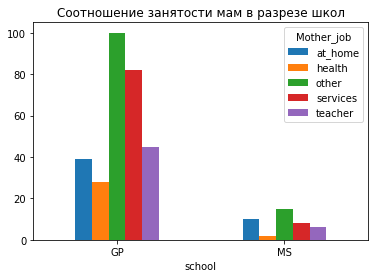

In [542]:
# посмотрим распределение в разрезе школ
stud_math.pivot_table(values='sex',
                      index=['school'], columns=['Mother_job'],
                      aggfunc='count').plot(kind='bar', title='Соотношение занятости мам в разрезе школ')
plt.xticks(rotation=0)
plt.show()

Т.к. наиболее часто встречающийся признак - другие, то можно сказать, что детализация признака не достаточна. Также можно заметить, что процент госслужащих в школе, в которой больше городских учеников, выше.

## Father_job
Номинативная величина с 32 пропусками.

In [543]:
# проверим уникальные значения
stud_math.Father_job.value_counts()

other       176
services     89
teacher      26
health       15
at_home      14
Name: Father_job, dtype: int64

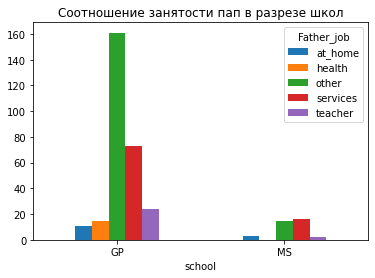

In [544]:
# посмотрим распределение в разрезе школ
stud_math.pivot_table(values='sex',
                      index=['school'], columns=['Father_job'],
                      aggfunc='count').plot(kind='bar', title='Соотношение занятости пап в разрезе школ')
plt.xticks(rotation=0)
plt.show()

Выводы по занятости пап аналогичны для мам: детализация признака не достаточна, госслужащие - доминирующий тип занятости.

## reason

Номинативная величина с 15 пропусками.

In [545]:
# проверим уникальные значения
stud_math.reason.value_counts()

course        119
reputation     96
home           89
other          33
Name: reason, dtype: int64

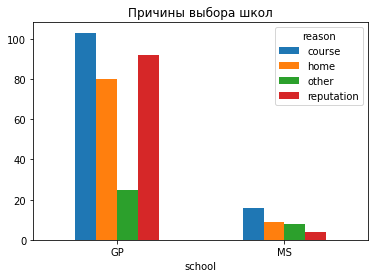

In [546]:
# посмотрим распределение в разрезе школ
stud_math.pivot_table(values='sex',
                      index=['school'], columns=['reason'],
                      aggfunc='count').plot(kind='bar', title='Причины выбора школ')
plt.xticks(rotation=0)
plt.show()

Как видно из графиков, программа является ключевой причиной для обеих школ. Но также видно, что близость к дому является очень важным фактором, что в сочетанни с преобладанием учеников из города в школе GP подтверждает, что данная школа расположена в городе.

## guardian

Номинативная величина с 29 пропусками.

In [547]:
# проверим уникальные значения
stud_math.guardian.value_counts()

mother    225
father     78
other      20
Name: guardian, dtype: int64

Большая часть опекунов - мамы.

## travel_time
цифровая величина с 4 вариантами и 23 пропусками

In [548]:
# проверим уникальные значения
stud_math.travel_time.value_counts()

1.0    219
2.0     86
3.0     17
4.0      7
Name: travel_time, dtype: int64

count    329.000000
mean       1.428571
std        0.690907
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: travel_time, dtype: float64

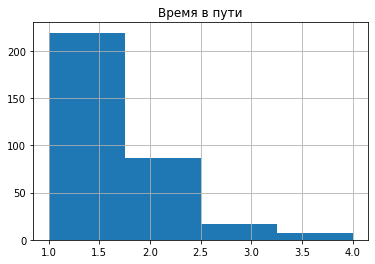

In [549]:
# Посмотрим на распределение признака, с учетом того, что может быть всего 4 дискретных значения
stud_math.travel_time.hist(bins = 4) 
plt.title('Время в пути')
stud_math.travel_time.describe()

Большая чать учеников тратит менее 15 мин на дорогу к школе. Посмотрим в разрезе школ.

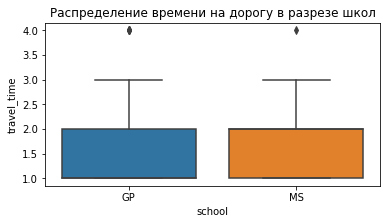

In [550]:
# рассмотрим время в пути в разрезе школ с использованием боксплот
fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x='school', y='travel_time', data=stud_math, ax=ax)
plt.xticks(rotation=0)
ax.set_title('Распределение времени на дорогу в разрезе школ')
plt.show()

время в дороге - идентично. Посмотрим количество выбросов:

In [551]:
stud_math[(stud_math.school == 'GP')&(stud_math.travel_time == 4)].travel_time.count()

6

In [552]:
stud_math[(stud_math.school == 'MS')&(stud_math.travel_time == 4)].travel_time.count()

1

Удалять выбросы пока не вижу оснований

## study_time

Время учебы вне школы. Может иметь 4 значения. Пропусков 7. Проверим уникальные значения.

In [553]:
# проверим уникальные значения
stud_math.study_time.value_counts()

2.0    173
1.0     90
3.0     58
4.0     24
Name: study_time, dtype: int64

Никаких выбросов нет.

count    345.000000
mean       2.046377
std        0.840919
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: study_time, dtype: float64

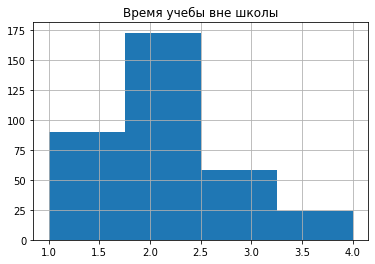

In [554]:
# Посмотрим на распределение признака, с учетом того, что может быть всего 4 дискретных значения
stud_math.study_time.hist(bins = 4) 
plt.title('Время учебы вне школы')
stud_math.study_time.describe()

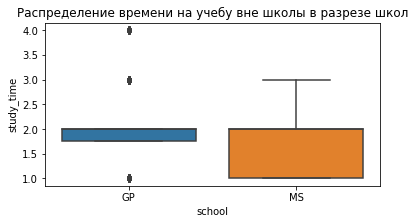

In [555]:
# рассмотрим время на учебу в разрезе школ с использованием боксплот
fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x='school', y='study_time', data=stud_math, ax=ax)
plt.xticks(rotation=0)
ax.set_title('Распределение времени на учебу вне школы в разрезе школ')
plt.show()

## failures

Пропущенных 22 значения. Посмотрим количество уникальных значений.

In [556]:
# проверим уникальные значения
stud_math.failures.value_counts()

0.0    273
1.0     38
2.0     11
3.0     10
Name: failures, dtype: int64

count    332.000000
mean       0.271084
std        0.667779
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

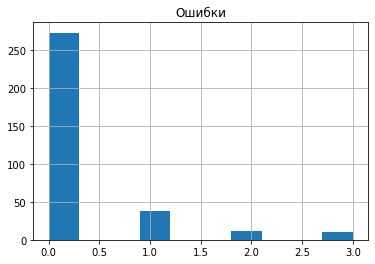

In [557]:
# Посмотрим на распределение признака, с учетом того, что может быть всего 4 дискретных значения
stud_math.failures.hist() 
plt.title('Ошибки')
stud_math.failures.describe()

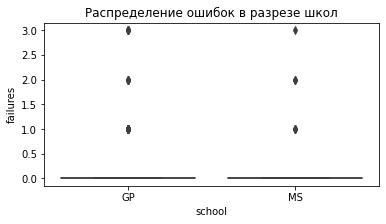

In [558]:
# рассмотрим ошибки в разрезе школ с использованием боксплот
fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x='school', y='failures', data=stud_math, ax=ax)
plt.xticks(rotation=0)
ax.set_title('Распределение ошибок в разрезе школ')
plt.show()

## school_sup

Пропущено 9 значений. Возможно стоит заменить на значения False/True

In [559]:
# проверим уникальные значения
stud_math.school_sup.value_counts()

no     295
yes     48
Name: school_sup, dtype: int64

никаких аномальных значений.

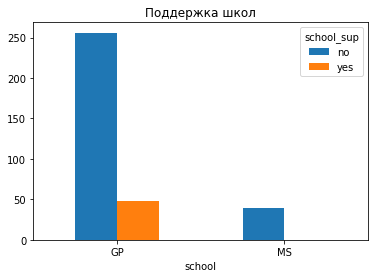

In [560]:
# посмотрим распределение в разрезе школ
stud_math.pivot_table(values='sex',
                      index=['school'], columns=['school_sup'],
                      aggfunc='count').plot(kind='bar', title='Поддержка школ')
plt.xticks(rotation=0)
plt.show()

Как видим, школа MS поддержки не оказывает.

## fam_sup

39 пропусков

In [561]:
# проверим уникальные значения
stud_math.fam_sup.value_counts()

yes    196
no     120
Name: fam_sup, dtype: int64

аномалий нет

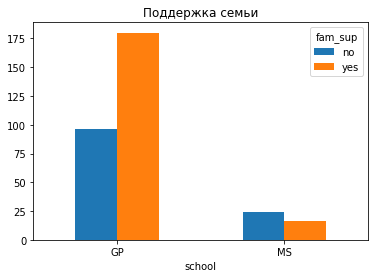

In [562]:
# посмотрим распределение в разрезе школ
stud_math.pivot_table(values='sex',
                      index=['school'], columns=['fam_sup'],
                      aggfunc='count').plot(kind='bar', title='Поддержка семьи')
plt.xticks(rotation=0)
plt.show()

Возможно меньшая поддержка семьи в школе MS объясняется более старшим возрастом учеников.

## math_paid
40 пропусков значений

In [563]:
# проверим уникальные значения
stud_math.math_paid.value_counts()

no     170
yes    146
Name: math_paid, dtype: int64

аномалий нет

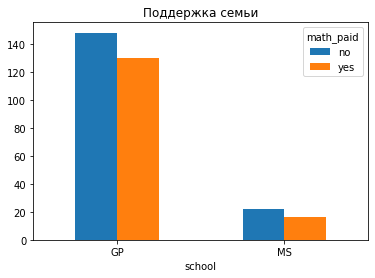

In [564]:
# посмотрим распределение в разрезе школ
stud_math.pivot_table(values='sex',
                      index=['school'], columns=['math_paid'],
                      aggfunc='count').plot(kind='bar', title='Поддержка семьи')
plt.xticks(rotation=0)
plt.show()

в обоих школах значительная часть учеников получала платные уроки по математике.

## activities

14 пропусков

In [565]:
# проверим уникальные значения
stud_math.activities.value_counts()

yes    172
no     168
Name: activities, dtype: int64

аномалий нет

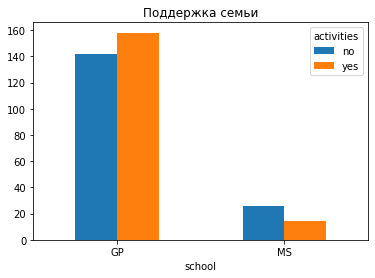

In [566]:
# посмотрим распределение в разрезе школ
stud_math.pivot_table(values='sex',
                      index=['school'], columns=['activities'],
                      aggfunc='count').plot(kind='bar', title='Поддержка семьи')
plt.xticks(rotation=0)
plt.show()

## nursery

16 пропусков

In [567]:
# проверим уникальные значения
stud_math.nursery.value_counts()

yes    272
no      68
Name: nursery, dtype: int64

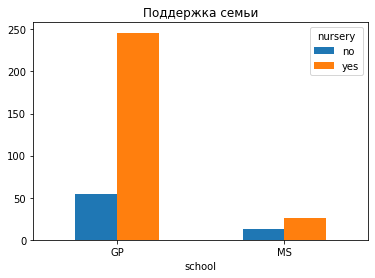

In [568]:
# посмотрим распределение в разрезе школ
stud_math.pivot_table(values='sex',
                      index=['school'], columns=['nursery'],
                      aggfunc='count').plot(kind='bar', title='Поддержка семьи')
plt.xticks(rotation=0)
plt.show()

## studytime, granular	
7 пропусков, столбец с непонятным значением.

In [569]:
# проверим уникальные значения
stud_math['studytime, granular'].value_counts()

-6.0     173
-3.0      90
-9.0      58
-12.0     24
Name: studytime, granular, dtype: int64

предположительно это время обучения в школе, лет, время обучения математике в неделю, часов или т.п.

count    345.000000
mean      -6.139130
std        2.522758
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

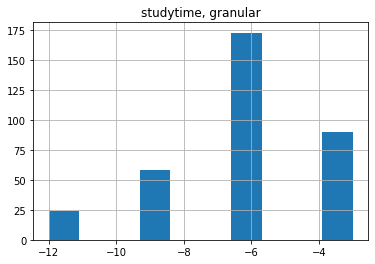

In [570]:
# Посмотрим на распределение признака, с учетом того, что может быть всего 4 дискретных значения
stud_math['studytime, granular'].hist()
plt.title('studytime, granular')
stud_math['studytime, granular'].describe()

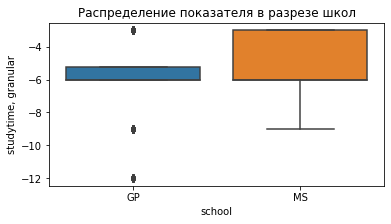

In [571]:
# рассмотрим показатель в разрезе школ с использованием боксплот
fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x='school', y='studytime, granular', data=stud_math, ax=ax)
plt.xticks(rotation=0)
ax.set_title('Распределение показателя в разрезе школ')
plt.show()

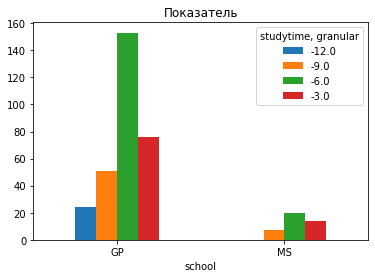

In [572]:
# посмотрим распределение в разрезе школ
stud_math.pivot_table(values='sex',
                      index=['school'], columns=['studytime, granular'],
                      aggfunc='count').plot(kind='bar', title='Показатель')
plt.xticks(rotation=0)
plt.show()

в школе MS не встречается значение -12

## higher

пропущено 2 значений

In [573]:
# проверим уникальные значения
stud_math.higher.value_counts()

yes    320
no      13
Name: higher, dtype: int64

аномальных значений нет.

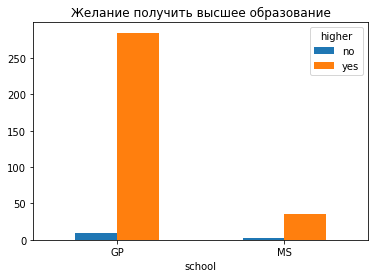

In [574]:
# посмотрим распределение в разрезе школ
stud_math.pivot_table(values='sex',
                      index=['school'], columns=['higher'],
                      aggfunc='count').plot(kind='bar', title='Желание получить высшее образование')
plt.xticks(rotation=0)
plt.show()

Большинство учеников планирует получать высшее образование

## internet

пропущено 36 значений

In [575]:
# проверим уникальные значения
stud_math.internet.value_counts()

yes    274
no      49
Name: internet, dtype: int64

аномалий нет

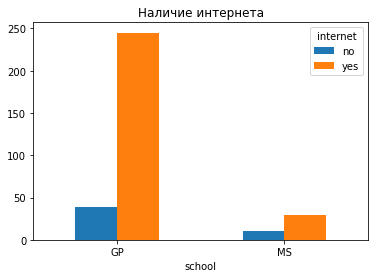

In [576]:
# посмотрим распределение в разрезе школ
stud_math.pivot_table(values='sex',
                      index=['school'], columns=['internet'],
                      aggfunc='count').plot(kind='bar', title='Наличие интернета')
plt.xticks(rotation=0)
plt.show()

Преобладающее большинство учеников имеет доступ к интернету.

## romantic

31 пропуск

In [577]:
# проверим уникальные значения
stud_math.romantic.value_counts()

no     219
yes    104
Name: romantic, dtype: int64

Аномалий нет.

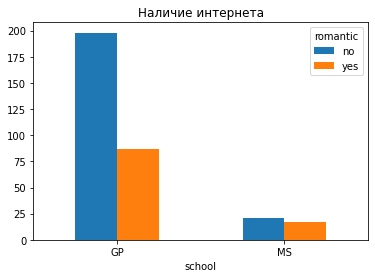

In [578]:
# посмотрим распределение в разрезе школ
stud_math.pivot_table(values='sex',
                      index=['school'], columns=['romantic'],
                      aggfunc='count').plot(kind='bar', title='Наличие интернета')
plt.xticks(rotation=0)
plt.show()

:) врядли романтические отношения как-то связаны с конкретной школой, только если это не религиозная секта :)

## fam_relations
27 пропусков. 5 дискретных значений.

In [579]:
# проверим уникальные значения
stud_math.fam_relations.value_counts()

 4.0    163
 5.0     88
 3.0     56
 2.0     14
 1.0      6
-1.0      1
Name: fam_relations, dtype: int64

Имеется аномальное значение. Предположительно случайно проставлен знак минуса. Заменим его.

In [580]:
stud_math.loc[:, ['fam_relations']] = stud_math.fam_relations.apply(lambda x: 1 if x == -1 else x)

In [581]:
# проверим уникальные значения еще раз
stud_math.fam_relations.value_counts()

4.0    163
5.0     88
3.0     56
2.0     14
1.0      7
Name: fam_relations, dtype: int64

count    328.000000
mean       3.948171
std        0.895314
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: fam_relations, dtype: float64

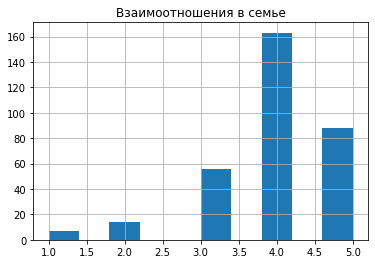

In [582]:
# Посмотрим на распределение признака, с учетом того, что может быть всего 5 дискретных значения
stud_math.fam_relations.hist() 
plt.title('Взаимоотношения в семье')
stud_math.fam_relations.describe()

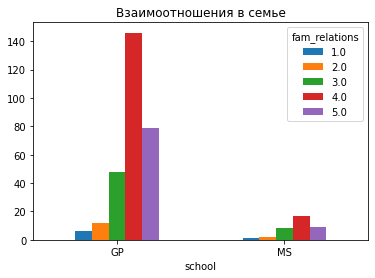

In [583]:
# посмотрим распределение в разрезе школ, вдруг одна из школ для детей из "плохих" семей
stud_math.pivot_table(values='sex',
                      index=['school'], columns=['fam_relations'],
                      aggfunc='count').plot(kind='bar', title='Взаимоотношения в семье')
plt.xticks(rotation=0)
plt.show()

В большей части семей взаимоотношения хорошие или приемлемые.

## free_time

11 пропусков

In [584]:
# проверим уникальные значения
stud_math.free_time.value_counts()

3.0    132
4.0    102
2.0     59
5.0     35
1.0     16
Name: free_time, dtype: int64

Аномалий нет.

count    344.000000
mean       3.235465
std        1.004258
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: free_time, dtype: float64

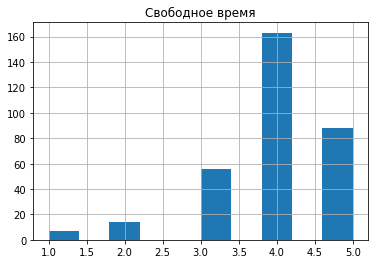

In [585]:
# Посмотрим на распределение признака, с учетом того, что может быть всего 5 дискретных значения
stud_math.fam_relations.hist() 
plt.title('Свободное время')
stud_math.free_time.describe()

## go_out

7 пропусков

In [586]:
# проверим уникальные значения
stud_math.go_out.value_counts()

3.0    118
2.0     92
4.0     74
5.0     43
1.0     19
Name: go_out, dtype: int64

Аномалий нет.

count    346.000000
mean       3.086705
std        1.091998
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: go_out, dtype: float64

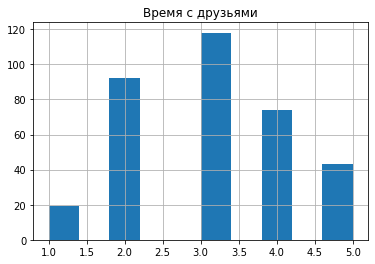

In [587]:
# Посмотрим на распределение признака, с учетом того, что может быть всего 5 дискретных значения
stud_math.go_out.hist() 
plt.title('Время с друзьями')
stud_math.go_out.describe()

## health	

15 пропусков, 5 дискретных вариантов ответа.

In [588]:
# проверим уникальные значения
stud_math.health.value_counts()

5.0    124
3.0     81
4.0     53
1.0     45
2.0     36
Name: health, dtype: int64

count    346.000000
mean       3.086705
std        1.091998
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: go_out, dtype: float64

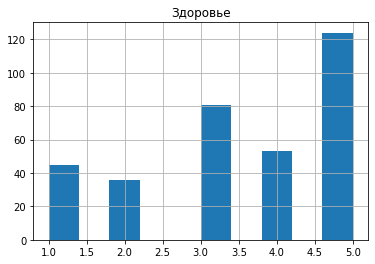

In [589]:
# Посмотрим на распределение признака, с учетом того, что может быть всего 5 дискретных значения
stud_math.health.hist() 
plt.title('Здоровье')
stud_math.go_out.describe()

## absences

12 пропусков

count    342.000000
mean       8.090643
std       24.704600
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

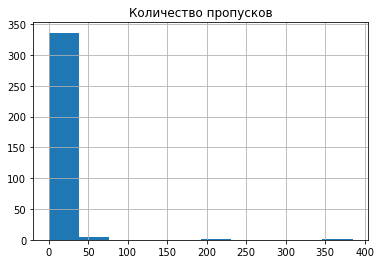

In [590]:
# Посмотрим на распределение признака, с учетом того, что может быть всего 5 дискретных значения
stud_math.absences.hist() 
plt.title('Количество пропусков')
stud_math.absences.describe()

Очевидно, что есть выбросы. IQR=8. Найдем количество выбросов.

In [591]:
stud_math[stud_math.absences > 8+8*1.5].absences.count()

17

Удалять выбросы пока не буду, т.к. возмжна потеря других ценных данных. Возможно позже заменю на средние значения.

# Корреляционный анализ

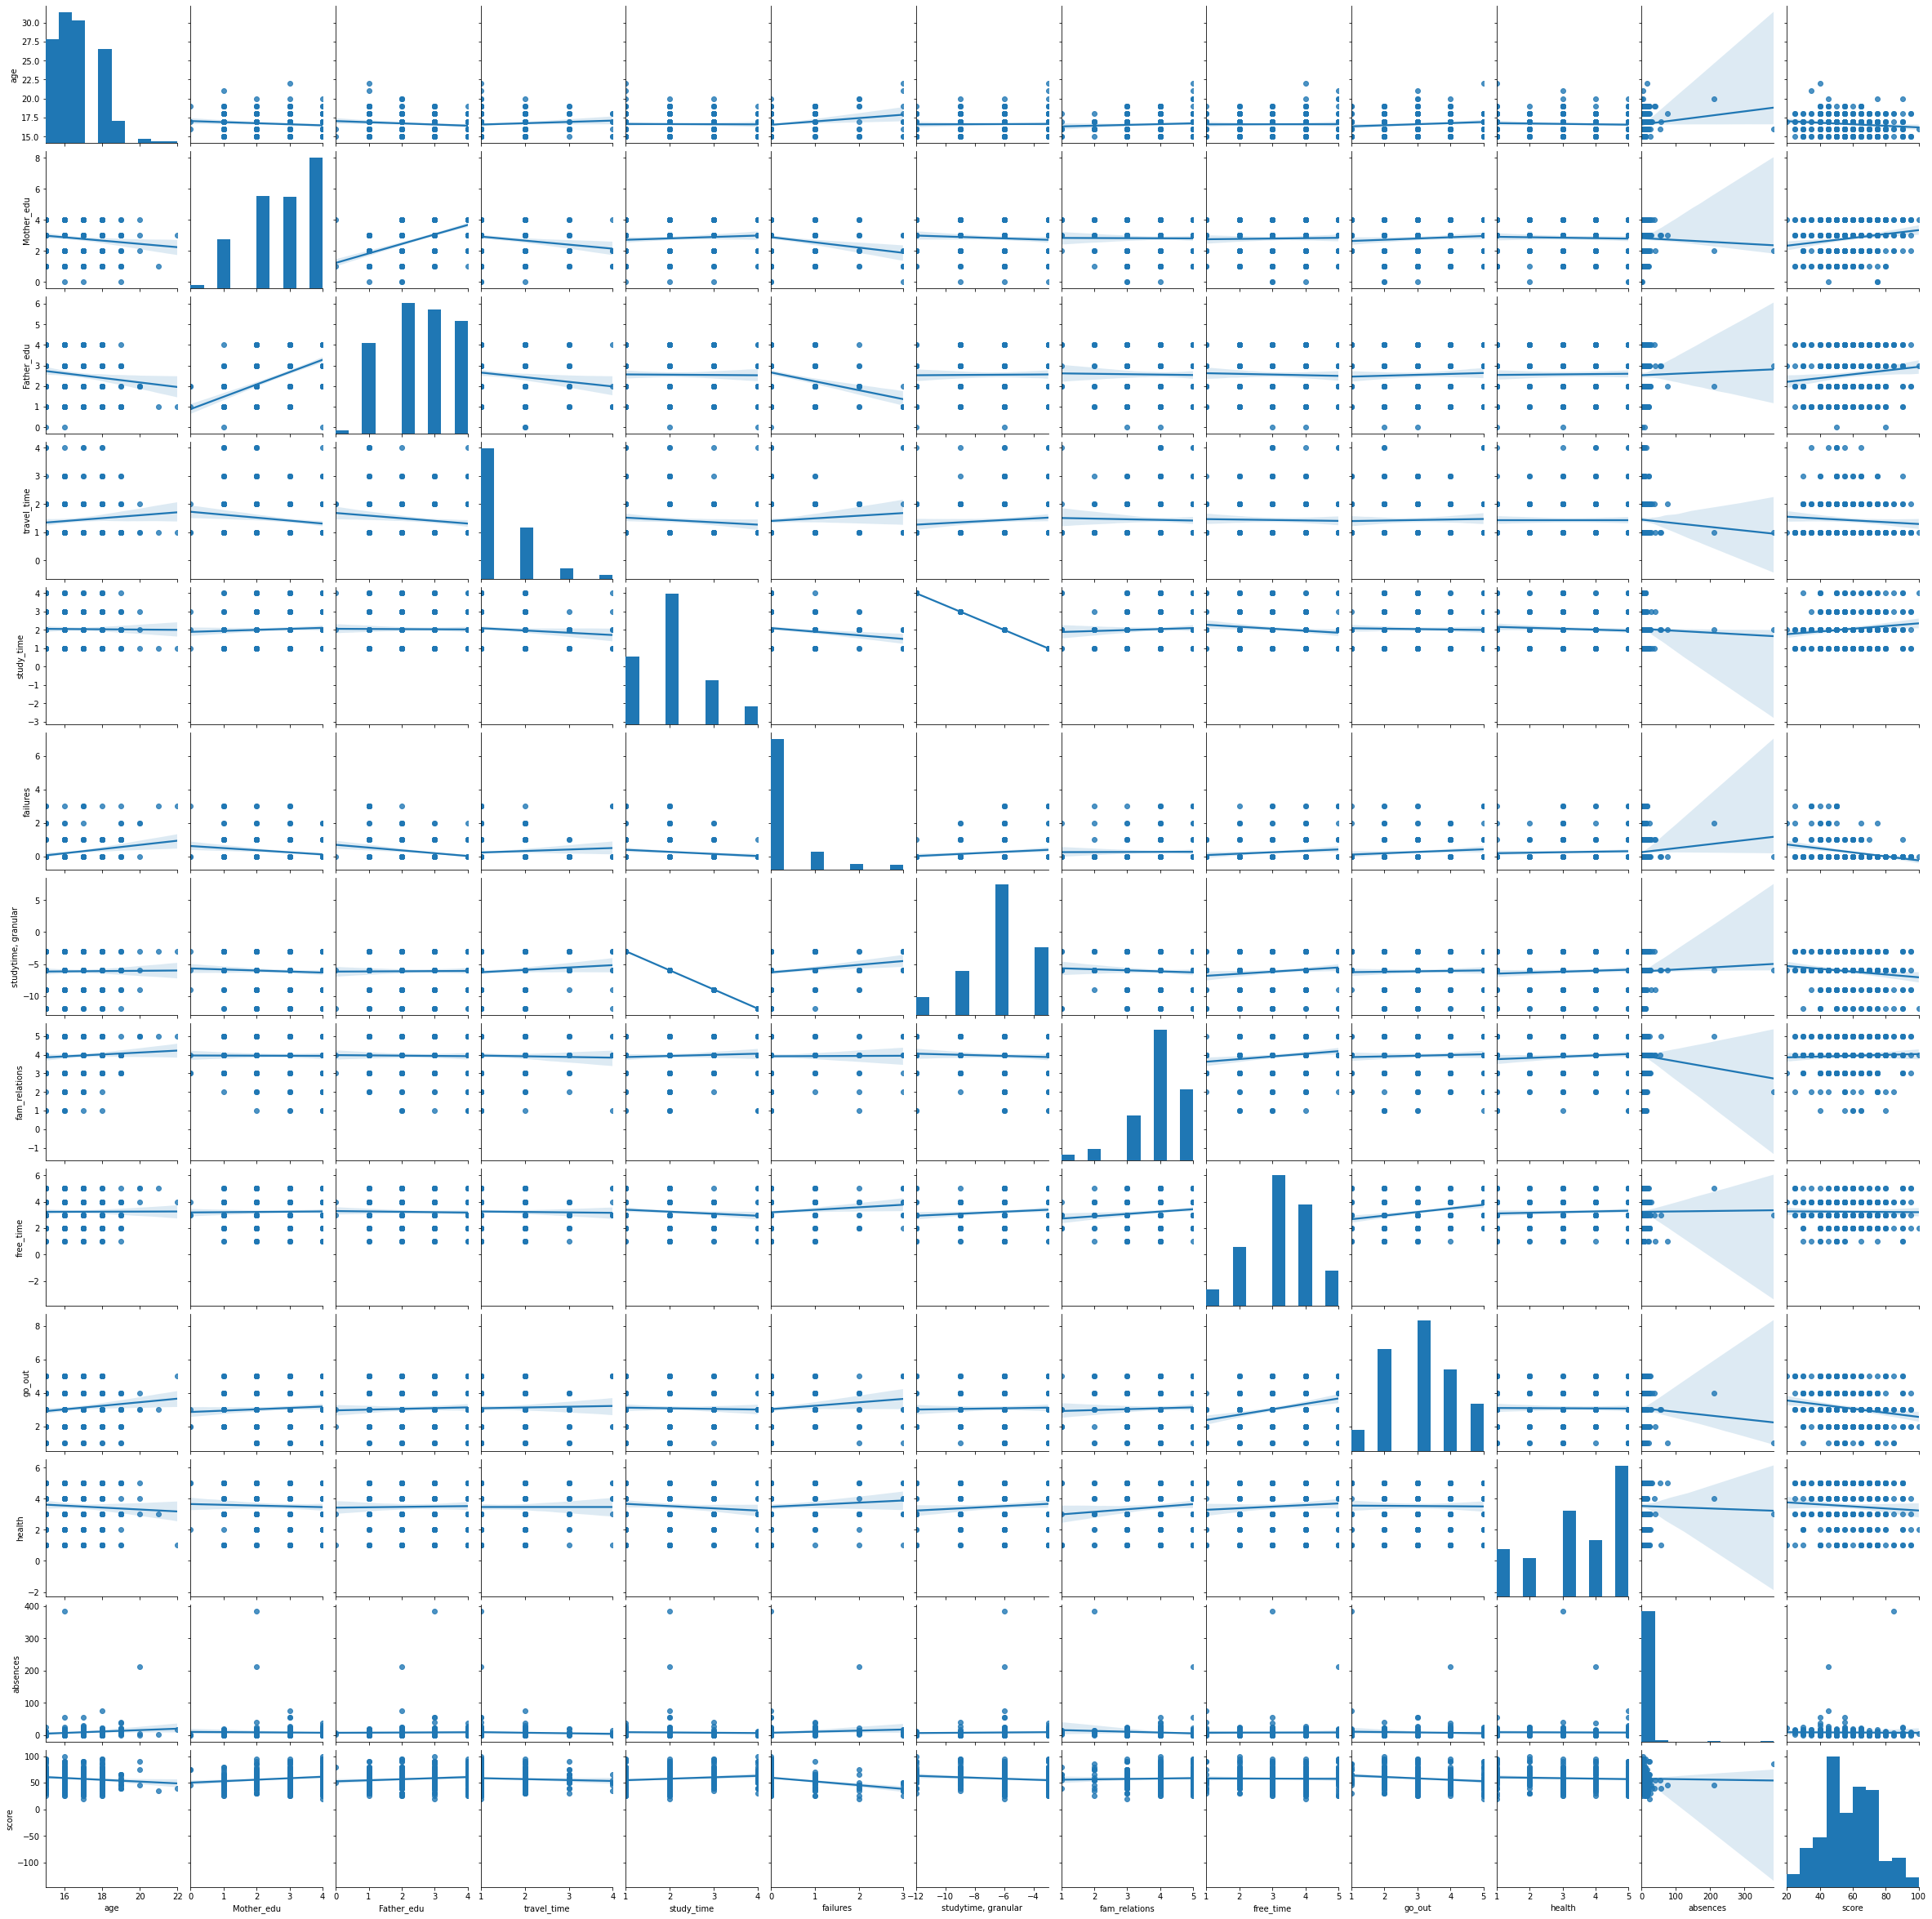

In [592]:
# воспользуемся функцией pairplot
sns.pairplot(stud_math, kind = 'reg')

In [593]:
stud_math.corr()

age  Mother_edu  Father_edu  travel_time  \
age                  1.000000   -0.122979   -0.130010     0.095370   
Mother_edu          -0.122979    1.000000    0.606270    -0.165394   
Father_edu          -0.130010    0.606270    1.000000    -0.145471   
travel_time          0.095370   -0.165394   -0.145471     1.000000   
study_time          -0.011426    0.070533   -0.010779    -0.101490   
failures             0.235875   -0.205944   -0.268901     0.091757   
studytime, granular  0.011426   -0.070533    0.010779     0.101490   
fam_relations        0.072918   -0.006133   -0.016694    -0.029299   
free_time            0.004837    0.021002   -0.030449    -0.023067   
go_out               0.123638    0.080556    0.044127     0.029374   
health              -0.056173   -0.038050    0.018671    -0.000092   
absences             0.112599   -0.027377    0.017545    -0.047560   
score               -0.131542    0.186477    0.135268    -0.075516   

                     study_time  failures  studytime, granular  fam_relations  \
age                   -0.011426  0.235875             0.011426       0.072918   
Mother_edu             0.070533 -0.205944            -0.070533      -0.006133   
Father_edu            -0.010779 -0.268901             0.010779      -0.016694   
travel_time           -0.101490  0.091757             0.101490      -0.029299   
study_time             1.000000 -0.156406            -1.000000       0.057143   
failures              -0.156406  1.000000             0.156406       0.006870   
studytime, granular   -1.000000  0.156406             1.000000      -0.057143   
fam_relations          0.057143  0.006870            -0.057143       1.000000   
free_time             -0.128661  0.127391             0.128661       0.158597   
go_out                -0.029686  0.126770             0.029686       0.045341   
health                -0.085469  0.064083             0.085469       0.107055   
absences              -0.030187  0.089541             0.030187      -0.090659   
score                  0.142055 -0.289377            -0.142055       0.040590   

                     free_time    go_out    health  absences     score  
age                   0.004837  0.123638 -0.056173  0.112599 -0.131542  
Mother_edu            0.021002  0.080556 -0.038050 -0.027377  0.186477  
Father_edu           -0.030449  0.044127  0.018671  0.017545  0.135268  
travel_time          -0.023067  0.029374 -0.000092 -0.047560 -0.075516  
study_time           -0.128661 -0.029686 -0.085469 -0.030187  0.142055  
failures              0.127391  0.126770  0.064083  0.089541 -0.289377  
studytime, granular   0.128661  0.029686  0.085469  0.030187 -0.142055  
fam_relations         0.158597  0.045341  0.107055 -0.090659  0.040590  
free_time             1.000000  0.296392  0.072729  0.007748 -0.012457  
go_out                0.296392  1.000000 -0.010343 -0.050616 -0.182286  
health                0.072729 -0.010343  1.000000 -0.014308 -0.075340  
absences              0.007748 -0.050616 -0.014308  1.000000 -0.014039  
score                -0.012457 -0.182286 -0.075340 -0.014039  1.000000

Как видно на матрице корреляций видно, что study_time и "studytime, granular" имею полную корреляцию. Удалим "studytime, granular".

In [594]:
stud_math.drop(['studytime, granular'], inplace = True, axis = 1)

In [595]:
stud_math.corr()

age  Mother_edu  Father_edu  travel_time  study_time  \
age            1.000000   -0.122979   -0.130010     0.095370   -0.011426   
Mother_edu    -0.122979    1.000000    0.606270    -0.165394    0.070533   
Father_edu    -0.130010    0.606270    1.000000    -0.145471   -0.010779   
travel_time    0.095370   -0.165394   -0.145471     1.000000   -0.101490   
study_time    -0.011426    0.070533   -0.010779    -0.101490    1.000000   
failures       0.235875   -0.205944   -0.268901     0.091757   -0.156406   
fam_relations  0.072918   -0.006133   -0.016694    -0.029299    0.057143   
free_time      0.004837    0.021002   -0.030449    -0.023067   -0.128661   
go_out         0.123638    0.080556    0.044127     0.029374   -0.029686   
health        -0.056173   -0.038050    0.018671    -0.000092   -0.085469   
absences       0.112599   -0.027377    0.017545    -0.047560   -0.030187   
score         -0.131542    0.186477    0.135268    -0.075516    0.142055   

               failures  fam_relations  free_time    go_out    health  \
age            0.235875       0.072918   0.004837  0.123638 -0.056173   
Mother_edu    -0.205944      -0.006133   0.021002  0.080556 -0.038050   
Father_edu    -0.268901      -0.016694  -0.030449  0.044127  0.018671   
travel_time    0.091757      -0.029299  -0.023067  0.029374 -0.000092   
study_time    -0.156406       0.057143  -0.128661 -0.029686 -0.085469   
failures       1.000000       0.006870   0.127391  0.126770  0.064083   
fam_relations  0.006870       1.000000   0.158597  0.045341  0.107055   
free_time      0.127391       0.158597   1.000000  0.296392  0.072729   
go_out         0.126770       0.045341   0.296392  1.000000 -0.010343   
health         0.064083       0.107055   0.072729 -0.010343  1.000000   
absences       0.089541      -0.090659   0.007748 -0.050616 -0.014308   
score         -0.289377       0.040590  -0.012457 -0.182286 -0.075340   

               absences     score  
age            0.112599 -0.131542  
Mother_edu    -0.027377  0.186477  
Father_edu     0.017545  0.135268  
travel_time   -0.047560 -0.075516  
study_time    -0.030187  0.142055  
failures       0.089541 -0.289377  
fam_relations -0.090659  0.040590  
free_time      0.007748 -0.012457  
go_out        -0.050616 -0.182286  
health        -0.014308 -0.075340  
absences       1.000000 -0.014039  
score         -0.014039  1.000000

Также видно, что высокю кореляцию имею показатели Mother_edu и Father_edu. Это естественный фактор, т.к. обычно семью создают люди с общими ценностями, но все же пока удалять один из показателей не стану, т.к. связь не достаточно высока.

In [596]:
stud_math.head(3)

school sex  age address famaly_size Cohabitation_status  Mother_edu  \
0     GP   F   18       U        None               apart         4.0   
1     GP   F   17       U         big                None         1.0   
2     GP   F   15       U       small            together         1.0   

   Father_edu Mother_job Father_job  reason guardian  travel_time  study_time  \
0         4.0    at_home    teacher  course   mother          2.0         2.0   
1         1.0    at_home      other  course   father          1.0         2.0   
2         1.0    at_home      other   other   mother          1.0         2.0   

   failures school_sup fam_sup math_paid activities nursery higher internet  \
0       0.0        yes      no        no         no     yes    yes     None   
1       0.0         no     yes        no         no      no    yes      yes   
2       3.0        yes      no      None         no     yes    yes      yes   

  romantic  fam_relations  free_time  go_out  health  absences  score  
0       no            4.0        3.0     4.0     3.0       6.0   30.0  
1       no            5.0        3.0     3.0     3.0       4.0   30.0  
2     None            4.0        3.0     2.0     3.0      10.0   50.0

**Попробуем усреднить выбросы для цифровых показателей и проверить показатели корреляции повторно**.

In [597]:
# Удалим выбросы по возрасту отдельно в каждой школе

GP_IQR = stud_math[stud_math.school == 'GP'].age.quantile(
    0.75) - stud_math[stud_math.school == 'GP'].age.quantile(0.25)
MS_IQR = stud_math[stud_math.school == 'MS'].age.quantile(
    0.75) - stud_math[stud_math.school == 'MS'].age.quantile(0.25)

# границы выбросов
GP_out = stud_math[stud_math.school == 'GP'].age.quantile(0.75) + 1.5*GP_IQR
MS_out = stud_math[stud_math.school == 'MS'].age.quantile(0.75) + 1.5*MS_IQR

# средние
GP_mean = round(stud_math[stud_math.school == 'GP'].age.mean())
MS_mean = round(stud_math[stud_math.school == 'MS'].age.mean())

In [598]:
# удаляем выбросы по возрасту в разрезе школ
stud_math.loc[stud_math.school == 'GP', 'age'] = stud_math.loc[stud_math.school ==
                                                               'GP', 'age'].apply(lambda x: GP_mean if x > GP_out else x)
stud_math.loc[stud_math.school == 'MS', 'age'] = stud_math.loc[stud_math.school ==
                                                               'MS', 'age'].apply(lambda x: MS_mean if x > MS_out else x)

In [599]:
stud_math

school sex  age address famaly_size Cohabitation_status  Mother_edu  \
0       GP   F   18       U        None               apart         4.0   
1       GP   F   17       U         big                None         1.0   
2       GP   F   15       U       small            together         1.0   
3       GP   F   15       U         big            together         4.0   
4       GP   F   16       U         big            together         3.0   
5       GP   M   16       U       small            together         4.0   
6       GP   M   16    None       small            together         2.0   
7       GP   F   17       U         big               apart         4.0   
8       GP   M   15       U       small               apart         3.0   
9       GP   M   15       U        None                None         3.0   
10      GP   F   15       U         big            together         4.0   
11      GP   F   15       U         big                None         2.0   
12      GP   M   15       U       small            together         4.0   
13      GP   M   15       U         big            together         4.0   
14      GP   M   15       U         big               apart         2.0   
15      GP   F   16       U         big                None         4.0   
16      GP   F   16       U         big            together         4.0   
17      GP   F   16       U         big            together         3.0   
18      GP   M   17       U         big            together         3.0   
19      GP   M   16       U       small            together         4.0   
20      GP   M   15       U         big            together         4.0   
21      GP   M   15       U         big            together         4.0   
22      GP   M   16       U       small            together         4.0   
23      GP   M   16       U       small            together         2.0   
24      GP   F   15       R         big            together         2.0   
25      GP   F   16       U         big                None         2.0   
26      GP   M   15       U         big            together         2.0   
27      GP   M   15       U         big            together         4.0   
28      GP   M   16       U       small                None         3.0   
29      GP   M   16       U         big            together         4.0   
30      GP   M   15       U         big            together         4.0   
31      GP   M   15       U         big            together         4.0   
32      GP   M   15       R        None            together         4.0   
33      GP   M   15       U       small            together         3.0   
34      GP   M   16       U         big            together         3.0   
35      GP   F   15       U         big            together         2.0   
36      GP   M   15       U        None            together         4.0   
37      GP   M   16       R         big               apart         4.0   
38      GP   F   15       R         big            together         3.0   
39      GP   F   15       R         big            together         2.0   
40      GP   F   16       U       small            together         2.0   
41      GP   M   15       U       small            together         4.0   
42      GP   M   15       U         big            together         4.0   
43      GP   M   15       U         big            together         2.0   
44      GP   F   16       U       small            together         2.0   
45      GP   F   15       U       small               apart         4.0   
46      GP   F   16       U       small               apart         3.0   
47      GP   M   16       U         big            together         4.0   
48      GP   M   15       U         big            together         4.0   
49      GP   F   15       U         big            together         4.0   
50      GP   F   16       U       small            together         2.0   
51      GP   F   15       U       small            together         4.0   
52      GP   M   15    None  

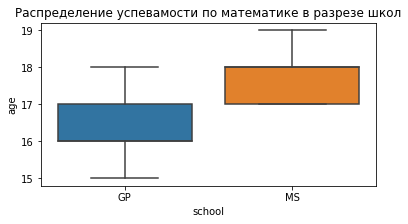

In [600]:
# убедимся, что выбросы убраны..
fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x='school', y='age', data=stud_math, ax=ax)
plt.xticks(rotation=0)
ax.set_title('Распределение успевамости по математике в разрезе школ')
plt.show()

In [605]:
stud_math[stud_math.Father_edu == 0]

school sex  age address famaly_size Cohabitation_status  Mother_edu  \
76      GP   M   15       U        None            together         4.0   
171     GP   M   16       U         big            together         1.0   

     Father_edu Mother_job Father_job      reason guardian  travel_time  \
76          0.0    teacher      other      course   mother          2.0   
171         0.0      other      other  reputation   mother          2.0   

     study_time  failures school_sup fam_sup math_paid activities nursery  \
76          4.0       0.0         no      no        no        yes     yes   
171         2.0       NaN         no     yes       yes        yes     yes   

    higher internet romantic  fam_relations  free_time  go_out  health  \
76    None      yes       no            3.0        4.0     3.0     1.0   
171   None      yes      yes            4.0        3.0     2.0     3.0   

     absences  score  
76        8.0   50.0  
171       2.0   80.0

In [606]:
stud_math.corr()

age  Mother_edu  Father_edu  travel_time  study_time  \
age            1.000000   -0.096746   -0.057384     0.154470   -0.008671   
Mother_edu    -0.096746    1.000000    0.606270    -0.165394    0.070533   
Father_edu    -0.057384    0.606270    1.000000    -0.145471   -0.010779   
travel_time    0.154470   -0.165394   -0.145471     1.000000   -0.101490   
study_time    -0.008671    0.070533   -0.010779    -0.101490    1.000000   
failures       0.037004   -0.205944   -0.268901     0.091757   -0.156406   
fam_relations  0.032164   -0.006133   -0.016694    -0.029299    0.057143   
free_time     -0.057297    0.021002   -0.030449    -0.023067   -0.128661   
go_out         0.159638    0.080556    0.044127     0.029374   -0.029686   
health        -0.017691   -0.038050    0.018671    -0.000092   -0.085469   
absences       0.052909   -0.027377    0.017545    -0.047560   -0.030187   
score         -0.130705    0.186477    0.135268    -0.075516    0.142055   

               failures  fam_relations  free_time    go_out    health  \
age            0.037004       0.032164  -0.057297  0.159638 -0.017691   
Mother_edu    -0.205944      -0.006133   0.021002  0.080556 -0.038050   
Father_edu    -0.268901      -0.016694  -0.030449  0.044127  0.018671   
travel_time    0.091757      -0.029299  -0.023067  0.029374 -0.000092   
study_time    -0.156406       0.057143  -0.128661 -0.029686 -0.085469   
failures       1.000000       0.006870   0.127391  0.126770  0.064083   
fam_relations  0.006870       1.000000   0.158597  0.045341  0.107055   
free_time      0.127391       0.158597   1.000000  0.296392  0.072729   
go_out         0.126770       0.045341   0.296392  1.000000 -0.010343   
health         0.064083       0.107055   0.072729 -0.010343  1.000000   
absences       0.089541      -0.090659   0.007748 -0.050616 -0.014308   
score         -0.289377       0.040590  -0.012457 -0.182286 -0.075340   

               absences     score  
age            0.052909 -0.130705  
Mother_edu    -0.027377  0.186477  
Father_edu     0.017545  0.135268  
travel_time   -0.047560 -0.075516  
study_time    -0.030187  0.142055  
failures       0.089541 -0.289377  
fam_relations -0.090659  0.040590  
free_time      0.007748 -0.012457  
go_out        -0.050616 -0.182286  
health        -0.014308 -0.075340  
absences       1.000000 -0.014039  
score         -0.014039  1.000000

Как видно на кореляционной матрице устранение выбросов по возрасту не привело к выявлению новых зависимостей, но даже уменьшило показатель кореляции возраста и оценки по математики, что говорит о том, что проводить данное усреднение не стоило. 

Попробую также проверить, даст ли эффект сутранение выбросов по пропускам.

In [609]:
# находим границы выбросов по пропускам
absences_IQR = stud_math.absences.quantile(
    0.75)-stud_math.absences.quantile(0.25)
absences_mean = stud_math.absences.mean()
stud_math.loc[:, ['absences']] = stud_math.absences.apply(lambda x: absences_mean if x > stud_math.absences.quantile(
    0.75)+1.5*absences_IQR else absences_mean if x < stud_math.absences.quantile(0.25)-1.5*absences_IQR else x)

count    342.000000
mean       4.951600
std        4.343433
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       17.000000
Name: absences, dtype: float64

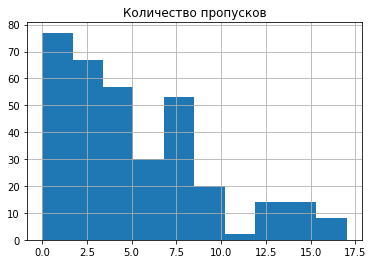

In [610]:
# Посмотрим на распределение признака absences после устранения выбросов
stud_math.absences.hist() 
plt.title('Количество пропусков')
stud_math.absences.describe()

In [611]:
stud_math.corr()

age  Mother_edu  Father_edu  travel_time  study_time  \
age            1.000000   -0.096746   -0.057384     0.154470   -0.008671   
Mother_edu    -0.096746    1.000000    0.606270    -0.165394    0.070533   
Father_edu    -0.057384    0.606270    1.000000    -0.145471   -0.010779   
travel_time    0.154470   -0.165394   -0.145471     1.000000   -0.101490   
study_time    -0.008671    0.070533   -0.010779    -0.101490    1.000000   
failures       0.037004   -0.205944   -0.268901     0.091757   -0.156406   
fam_relations  0.032164   -0.006133   -0.016694    -0.029299    0.057143   
free_time     -0.057297    0.021002   -0.030449    -0.023067   -0.128661   
go_out         0.159638    0.080556    0.044127     0.029374   -0.029686   
health        -0.017691   -0.038050    0.018671    -0.000092   -0.085469   
absences       0.150178    0.085344   -0.010030    -0.052434   -0.072690   
score         -0.130705    0.186477    0.135268    -0.075516    0.142055   

               failures  fam_relations  free_time    go_out    health  \
age            0.037004       0.032164  -0.057297  0.159638 -0.017691   
Mother_edu    -0.205944      -0.006133   0.021002  0.080556 -0.038050   
Father_edu    -0.268901      -0.016694  -0.030449  0.044127  0.018671   
travel_time    0.091757      -0.029299  -0.023067  0.029374 -0.000092   
study_time    -0.156406       0.057143  -0.128661 -0.029686 -0.085469   
failures       1.000000       0.006870   0.127391  0.126770  0.064083   
fam_relations  0.006870       1.000000   0.158597  0.045341  0.107055   
free_time      0.127391       0.158597   1.000000  0.296392  0.072729   
go_out         0.126770       0.045341   0.296392  1.000000 -0.010343   
health         0.064083       0.107055   0.072729 -0.010343  1.000000   
absences       0.189040      -0.113095   0.061662  0.152343 -0.035532   
score         -0.289377       0.040590  -0.012457 -0.182286 -0.075340   

               absences     score  
age            0.150178 -0.130705  
Mother_edu     0.085344  0.186477  
Father_edu    -0.010030  0.135268  
travel_time   -0.052434 -0.075516  
study_time    -0.072690  0.142055  
failures       0.189040 -0.289377  
fam_relations -0.113095  0.040590  
free_time      0.061662 -0.012457  
go_out         0.152343 -0.182286  
health        -0.035532 -0.075340  
absences       1.000000 -0.235482  
score         -0.235482  1.000000

Как видно из корреляционной матрицы, коэффициент корреляции между показателями score и abscences увеличился с -0.014039 до -0.235482, что свидетельствует об положительном эффекте от устранения выбросов. По здравому смыслу эти показатели действительно должны коррелировать. Устранять выбросы по показателю failures нет смысла, т.к. там останется одно знаение 0, которое не может ни с чем коррелировать. В остальных числовых показателях тоже не вижу смысла устранять выбросы, т.к. они имеют 5 и менее вариантов значений. Устранение хоть одного значения сокращает количество вариантов минимум на 20%. С 4 и менее вариантами ответа говорить о корреляции тоже сложно.

# Анализ номинативных переменных

Проанализируем зависимость оценки от номинативных показателей. Все они имеют менее 10 вариантов, поэтому "обрезать" данные не нужно.

In [601]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (len(stud_math.loc[:, column].value_counts().index)*2, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

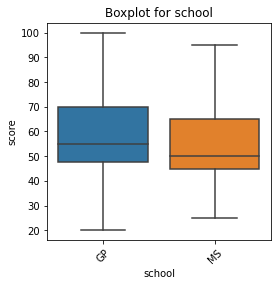

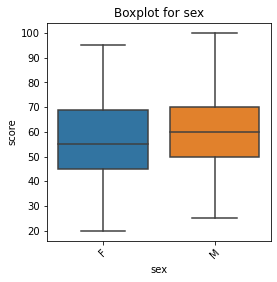

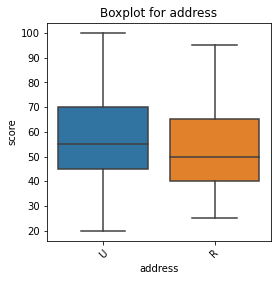

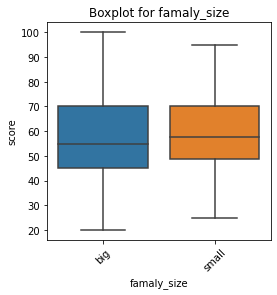

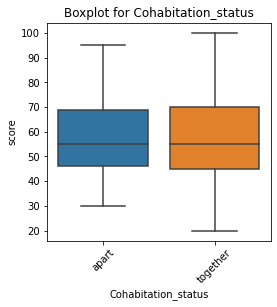

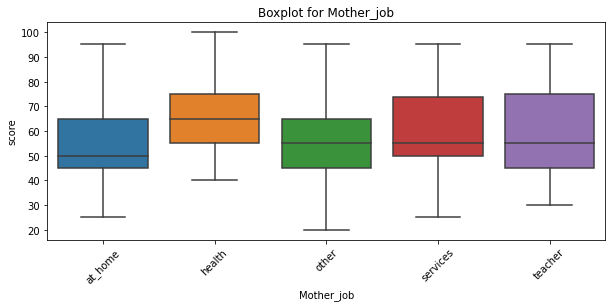

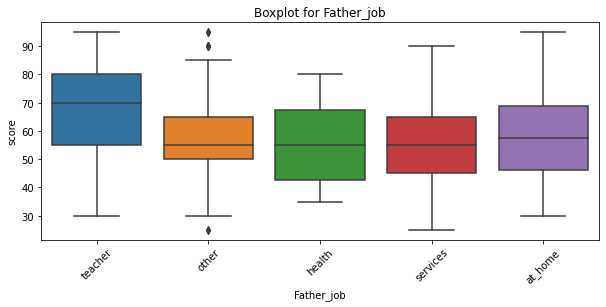

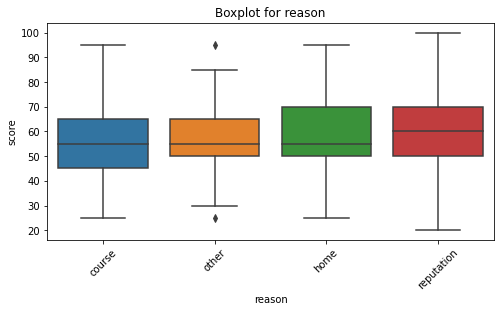

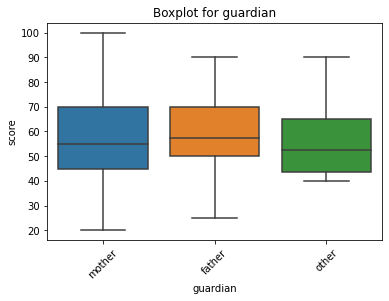

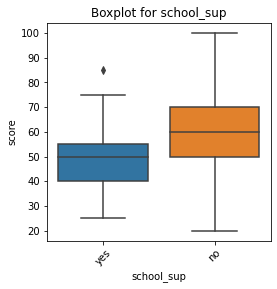

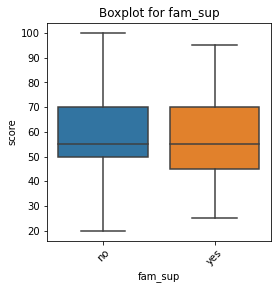

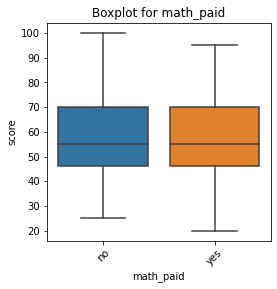

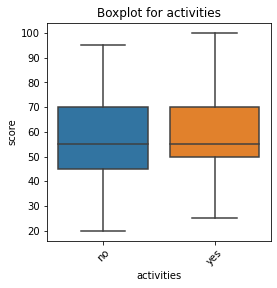

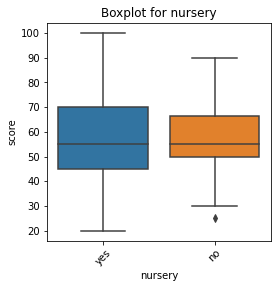

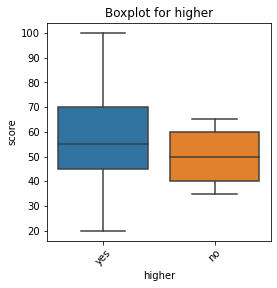

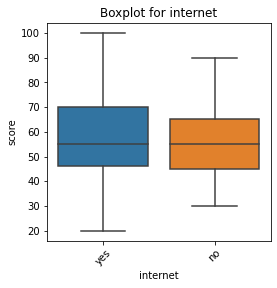

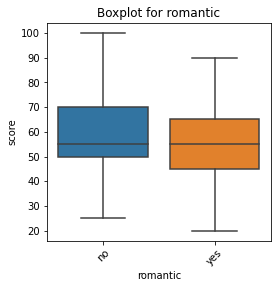

In [615]:
for col in ['school', 'sex', 'address', 'famaly_size', 'Cohabitation_status', 
            'Mother_job', 'Father_job', 'reason', 'guardian', 'school_sup', 'fam_sup', 
            'math_paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Судя по графикам, очень слабая зависимость между оценкой по математике и посещением платных уроков по математике ('math_paid'), а также между оценкой по математике и типом сожительства в семье ('Cohabitation_status').

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью **теста Стьюдента**. Проверим нулевую гипотезу о том, что распределения оценок по математике по различным параметрам неразличимы:

In [603]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [616]:
for col in ['school', 'sex', 'address', 'famaly_size', 'Cohabitation_status', 
            'Mother_job', 'Father_job', 'reason', 'guardian', 'school_sup', 'fam_sup', 
            'math_paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mother_job
Найдены статистически значимые различия для колонки Father_job
Найдены статистически значимые различия для колонки school_sup


удалим другие номинативные признаки.

In [617]:
stud_math.drop(['school', 'sex', 'famaly_size', 'Cohabitation_status', 
            'reason', 'guardian', 'fam_sup', 
            'math_paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'], inplace = True, axis = 1)

In [618]:
stud_math

age address  Mother_edu  Father_edu Mother_job Father_job  travel_time  \
0     18       U         4.0         4.0    at_home    teacher          2.0   
1     17       U         1.0         1.0    at_home      other          1.0   
2     15       U         1.0         1.0    at_home      other          1.0   
3     15       U         4.0         2.0     health       None          1.0   
4     16       U         3.0         3.0      other      other          1.0   
5     16       U         4.0         3.0   services      other          1.0   
6     16    None         2.0         2.0      other      other          1.0   
7     17       U         4.0         4.0      other    teacher          2.0   
8     15       U         3.0         2.0   services      other          1.0   
9     15       U         3.0         4.0      other      other          1.0   
10    15       U         4.0         4.0    teacher     health          1.0   
11    15       U         2.0         4.0   services      other          3.0   
12    15       U         4.0         4.0     health   services          1.0   
13    15       U         4.0         3.0    teacher      other          2.0   
14    15       U         2.0         2.0      other      other          1.0   
15    16       U         4.0         4.0     health      other          1.0   
16    16       U         4.0         4.0   services   services          1.0   
17    16       U         3.0         3.0      other       None          3.0   
18    17       U         3.0         2.0   services   services          1.0   
19    16       U         4.0         3.0     health      other          1.0   
20    15       U         4.0         3.0    teacher      other          1.0   
21    15       U         4.0         NaN     health     health          1.0   
22    16       U         4.0         2.0    teacher       None          1.0   
23    16       U         2.0         2.0      other      other          2.0   
24    15       R         2.0         4.0   services     health          1.0   
25    16       U         2.0         2.0   services   services          1.0   
26    15       U         2.0         2.0      other       None          NaN   
27    15       U         4.0         2.0     health   services          1.0   
28    16       U         3.0         4.0   services      other          1.0   
29    16       U         4.0         4.0       None    teacher          1.0   
30    15       U         4.0         4.0     health   services          NaN   
31    15       U         4.0         4.0   services       None          2.0   
32    15       R         4.0         3.0    teacher    at_home          1.0   
33    15       U         3.0         3.0      other      other          1.0   
34    16       U         3.0         2.0      other      other          1.0   
35    15       U         2.0         3.0      other      other          NaN   
36    15       U         4.0         3.0    teacher   services          1.0   
37    16       R         4.0         4.0      other    teacher          NaN   
38    15       R         3.0         4.0   services     health          1.0   
39    15       R         2.0         2.0    at_home      other          1.0   
40    16       U         2.0         2.0      other      other          2.0   
41    15       U         4.0         4.0    teacher      other          1.0   
42    15       U         4.0         NaN   services    teacher          1.0   
43    15       U         2.0         2.0   services   services          1.0   
44    16       U         2.0         2.0      other       None          2.0   
45    15       U         4.0         3.0      other      other          1.0   
46    16       U         3.0         NaN      other   services          1.0   
47    16       U         4.0         3.0     health       None          1.0   
48    15       U         4.0         2.0    teacher      other          1.0   
49    15       U         4.0         4.0   services    

# Выводы

1. В датасете достаточно мало пропусков, что говорит о достаточно высоком качестве данных.
2. Хороший эффект дало устранение выбросов по показателю **absences**, существенно увеличив коррелицию с целевым показателем.
3. Матрица корреляции показывает наибольшую отрицательную корреляцию с целевым показателем следующих факторов: **failures, go_out, absences**.
4. Перечень показателей, которые оставлены для модели, следующий: **age, address, Mother_edu, Father_edu, Mother_job	Father_job, travel_time, study_time, failures, school_sup, fam_relations, free_time, go_out, health, absences**
5. Вызывает вопрос сравнительно высокая корреляция между показателями Mother_edu и Father_edu на уровне 0.61, возможно в дальнейшем придется удалить один из показателей из модели.